<a href="https://colab.research.google.com/github/mehmet-apalan/GlobalAIHubMLCourse/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X, y = make_blobs(n_samples=2000, centers=3, n_features=3, random_state=0)

In [ ]:
print(X.shape)

(2000, 3)


In [ ]:
y

array([1, 2, 1, ..., 1, 2, 1])

In [ ]:
data = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
data.head(10)

,x,y,label
0,0.378197,-0.822654,1
1,0.112908,8.072768,2
2,1.875986,-2.862337,1
3,-1.210594,6.876798,2
4,2.095730,3.335208,0
5,-0.736323,-1.448668,1
6,1.552307,-2.412125,1
7,-0.288886,-0.245055,1
8,0.775775,3.653528,0
9,0.641320,8.800777,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   label   2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [ ]:
data.describe()

,x,y,label
count,2000.000000,2000.000000,2000.000000
mean,0.240772,3.493821,0.999500
std,1.420266,4.002951,0.816599
min,-4.365209,-5.351844,0.000000
25%,-0.758331,-0.964595,0.000000
50%,0.381250,4.278380,1.000000
75%,1.244579,7.137660,2.000000
max,4.077801,11.046691,2.000000


In [ ]:
data.isna().sum()

x        0
y        0
label    0
dtype: int64

In [ ]:
data.isin(['?']).sum()

x        0
y        0
label    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


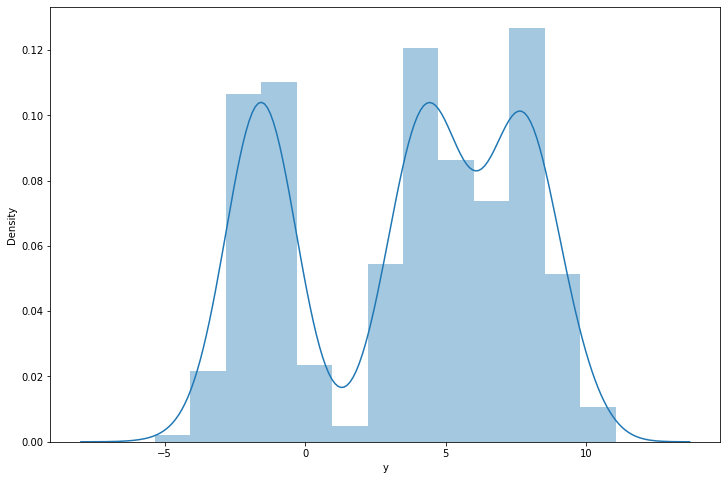

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(data["y"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


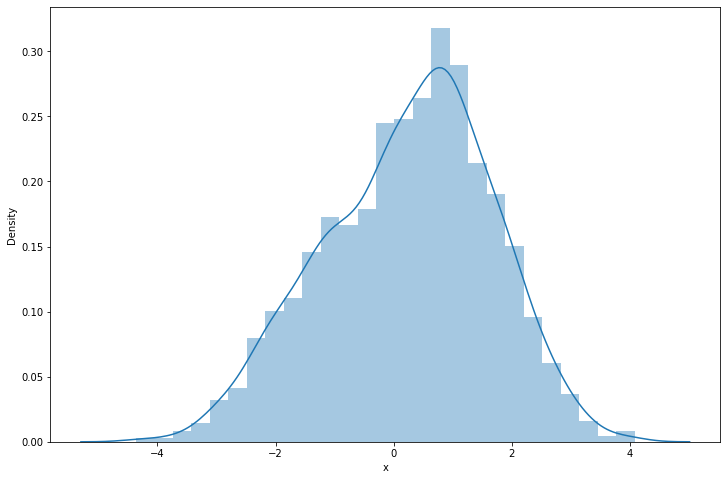

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(data["x"])

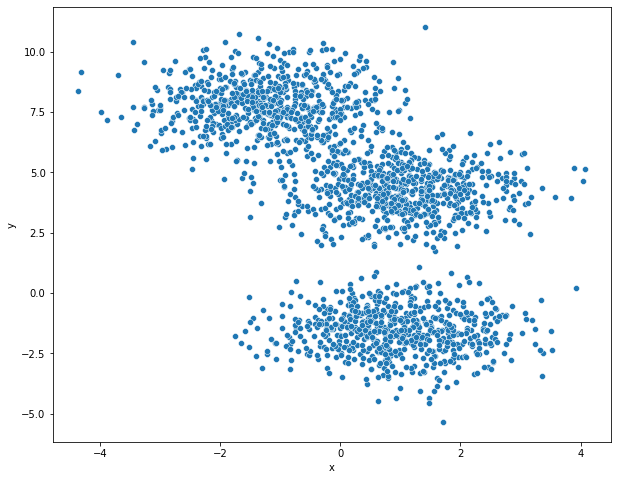

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.scatterplot(x="x", y="y", data=data)

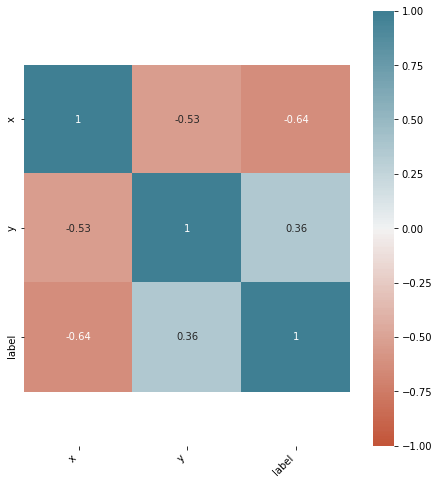

In [ ]:
import seaborn as sns
corr = data.corr()

plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[9.67842105e-02, 1.07859280e+00, 6.12449111e-04],
       [9.00502040e-02, 1.14417860e+00, 1.22551067e+00],
       [1.15163195e+00, 1.58826505e+00, 6.12449111e-04],
       ...,
       [9.45044461e-01, 1.00466412e+00, 6.12449111e-04],
       [8.97424726e-01, 1.25494356e+00, 1.22551067e+00],
       [1.42912074e+00, 1.50338438e+00, 6.12449111e-04]])

In [ ]:
y_new = y[list(data["label"])]
len(y_new)

2000

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(data)
X_scaled

array([[0.56181456, 0.27619483, 0.5       ],
       [0.53039352, 0.81864702, 1.        ],
       [0.73921455, 0.15181279, 0.5       ],
       ...,
       [0.70447151, 0.29423662, 0.5       ],
       [0.39461257, 0.84567845, 1.        ],
       [0.78588148, 0.17252734, 0.5       ]])

In [ ]:
#Scaling and outlier removed
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 1.0
Test accuracy: 1.0


In [ ]:
from sklearn.linear_model import LinearRegression
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print(f'Regression model coef:\n {regression_model.coef_}')

Regression model coef:
 [ 0.14102836 -1.95460066  0.4628449 ]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9966666666666667
